# Find characteristic length scale in microscopy image

Our experimental partners provided us with a wonderful video of a growing E. coli colony, unfortunately, they did not attach a ruler, that is needed for accurately coding the coordinates of the bacteria.
Goal of this script is to infer a plausible characteristic length scale from the microscopy image, that agrees with basic theory about the dimensions of E. coli bacteria.
The presented microscopy images were published in: 
**You, Zhihong, et al. "Geometry and mechanics of microdomains in growing bacterial colonies." Physical Review X 8.3 (2018): 031065.**

## Theory of E. coli bacteria

E. coli bacteria are bacilli (i.e. rod shaped bacteria), that grow along their symmetry axis up to a critical length. When a bacterium reaches the critical length, it splits into two daughter bacteria of approximately equal length.
The critical length depends on the environmental conditions and is in the range of 4-6 microns. At the same time, the width of bacteria is approximately conserved at roughly 1 micron. Thus, it should be the easiest to calculate the average width of a sample of bacteria to obtain a useful length scale.

## Measuring the width of bacteria
Using ImageJ, I measure the brightness profile along a line that perpendicularly intersects with several adjacent bacteria. This provides an oscillating signal, of which I can extract the peak-to-peak distances to infer the dominant wave-length, i.e. the average particle width.
I obtain the perpendicular intersection line, by measuring the parallel direction and rotating by 90 degrees.
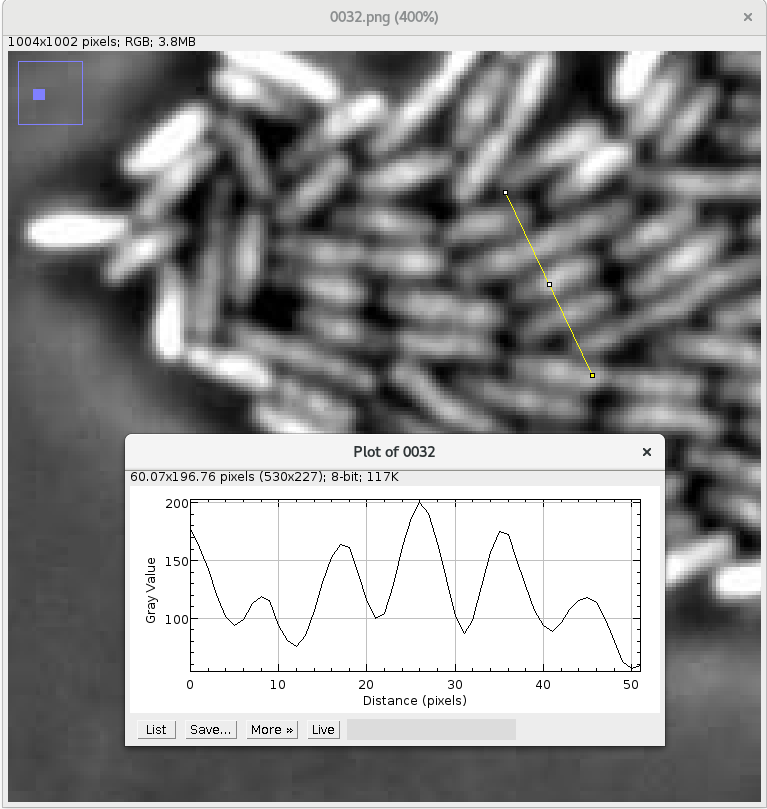
This view can be reached via ImageJ, by drawing a line, and selecting the menu: Analyze -> Plot Profile

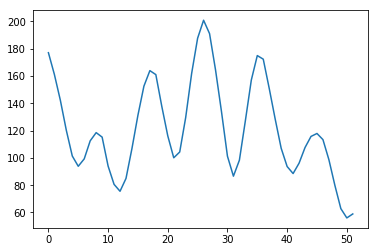

In [83]:
import csv
import numpy as np
from matplotlib import pyplot as plt


data = np.loadtxt(open("data/0032_1.csv", "r"), delimiter=",", skiprows=1)
plt.plot(data[:,0], data[:,1])
plt.show()

## Sampling
I decided to sample a couple of lines in the colony to collect some statistics (in total 9 profiles in two consecutive colony pictures), and calculate the mean and standard deviation.
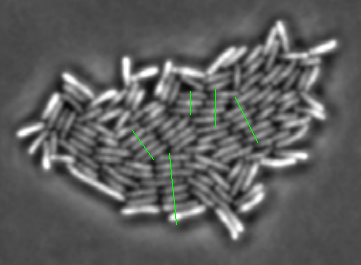

In [84]:
import glob
from scipy.signal import find_peaks

peak2peak_distances = []

for filename in glob.glob('data/*.csv'):
    data = np.loadtxt(open(filename, "r"), delimiter=",", skiprows=1)
    
    peaks = find_peaks(data[:,1])
    peak2peak_distances += list(peaks[0][1:]-peaks[0][:-1])

print(peak2peak_distances, np.mean(peak2peak_distances), np.std(peak2peak_distances))

[9, 9, 9, 10, 11, 9, 9, 9, 10, 8, 10, 9, 9, 9, 9, 11, 8, 10, 8, 10, 8, 10, 8, 10, 10, 9, 9, 10, 10] 9.310344827586206 0.8347392025455315


# Summary and Results

I infered from a microscopy image and theoretical background knowledge the characteristic length-scale using peak-to-peak distances of the brightness profiles along lines perpendicular to adjacent, parallely oriented bacteria. I sampled a couple of brightness profiles and found a mean bacteria width of 9.3px (~1 micron) with a standard deviation of 0.8px, this is less than 10% and suffices for my purposes.